In [11]:
import pandas as pd
from pandas import DataFrame

path_data: str = ('../../data/processed/all_games_merged_old_processed.jsonl')
save_path: str = ('../../data/training_data/D20003.csv')

all_data: pd.DataFrame = pd.read_json(path_data, lines=True)

In [12]:
all_data.head()

,game,game_id,model,benchmark_version,experiment,episode,Aborted,Lose,Success,chat,target,player
0,wordle,1,claude-v1.3-t0.0--claude-v1.3-t0.0,v0.9,0_high_frequency_words_no_clue_no_critic,episode_0,0,1,0,"[{'role': 'user', 'content': 'You are a langua...",acute,Player 1
1,wordle,2,claude-v1.3-t0.0--claude-v1.3-t0.0,v0.9,0_high_frequency_words_no_clue_no_critic,episode_1,0,1,0,"[{'role': 'user', 'content': 'You are a langua...",blade,Player 1
2,wordle,3,claude-v1.3-t0.0--claude-v1.3-t0.0,v0.9,0_high_frequency_words_no_clue_no_critic,episode_2,0,1,0,"[{'role': 'user', 'content': 'You are a langua...",wacky,Player 1
3,wordle,4,claude-v1.3-t0.0--claude-v1.3-t0.0,v0.9,0_high_frequency_words_no_clue_no_critic,episode_3,0,1,0,"[{'role': 'user', 'content': 'You are a langua...",extol,Player 1
4,wordle,5,claude-v1.3-t0.0--claude-v1.3-t0.0,v0.9,0_high_frequency_words_no_clue_no_critic,episode_4,0,1,0,"[{'role': 'user', 'content': 'You are a langua...",polka,Player 1


In [19]:
# The list of the top 10 models from benchmark version 0.9-1.0
top_10_models: list = [
    'gpt-4-0613-t0.0--gpt-4-0613-t0.0',
    'claude-v1.3-t0.0--claude-v1.3-t0.0',
    'gpt-4-1106-preview-t0.0--gpt-4-1106-preview-t0.0',
    'gpt-4-t0.0--gpt-4-t0.0',
    'gpt-4-0314-t0.0--gpt-4-0314-t0.0',
    'claude-2.1-t0.0--claude-2.1-t0.0',
    'gpt-4-t0.0--gpt-3.5-turbo-t0.0',
    'claude-2-t0.0--claude-2-t0.0',
    'gpt-3.5-turbo-1106-t0.0--gpt-3.5-turbo-1106-t0.0',
    'gpt-3.5-turbo-0613-t0.0--gpt-3.5-turbo-0613-t0.0',
]

top_3_models: list = top_10_models[:3]
top_1_models: list = [top_10_models[0]]

In [20]:
data_top_k: DataFrame = all_data[all_data.model.isin(top_1_models)]
data_successful: DataFrame = data_top_k[data_top_k.Success == 1]

In [21]:
len(data_top_k), len(data_successful)

(447, 318)

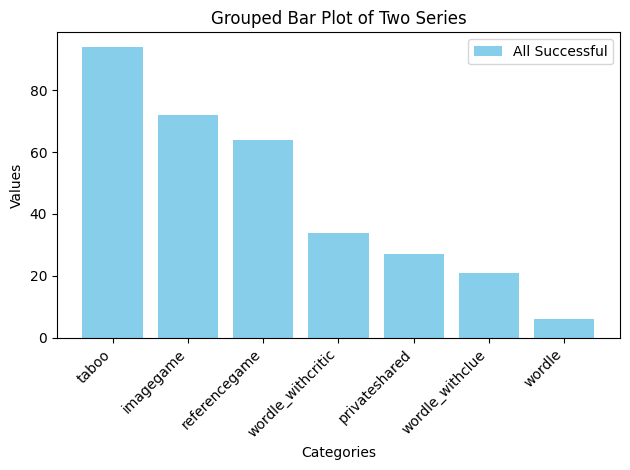

In [22]:
import matplotlib.pyplot as plt
import numpy as np

series1 = data_successful.game.value_counts()

# Set the positions and width for the bars
index = np.arange(len(series1))  # The label locations

# Create the bar plots for both series
plt.bar(index, series1, label='Series 1', color='skyblue')

# Adding labels, title, and legend
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Grouped Bar Plot of Two Series')
plt.legend([ 'All Successful'])  # Show legend
plt.xticks(index, series1.index, rotation=45, ha='right')  # Center x-tick labels


# Show the plot
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()

In [23]:
data_successful.to_csv(save_path, index=False)

In [8]:
img = data_successful[data_successful.game == 'imagegame']

In [9]:
img.head()

,game,game_id,model,benchmark_version,experiment,episode,Aborted,Lose,Success,chat,target,player
6482,imagegame,0,gpt-4-0613-t0.0--gpt-4-0613-t0.0,v1.0,0_compact_grids,episode_0,0,0,1,"[{'role': 'user', 'content': 'Let us play a ga...",B ▢ ▢ ▢ ▢\nB ▢ ▢ ▢ ▢\nB ▢ ▢ ▢ ▢\nB ▢ ▢ ▢ ▢\nB ...,player 1
6483,imagegame,1,gpt-4-0613-t0.0--gpt-4-0613-t0.0,v1.0,0_compact_grids,episode_1,0,0,1,"[{'role': 'user', 'content': 'Let us play a ga...",S S S S S\n▢ ▢ ▢ ▢ S\n▢ ▢ ▢ ▢ S\n▢ ▢ ▢ ▢ S\n▢ ...,player 1
6484,imagegame,10,gpt-4-0613-t0.0--gpt-4-0613-t0.0,v1.0,0_compact_grids,episode_10,0,0,1,"[{'role': 'user', 'content': 'Let us play a ga...",Y ▢ ▢ ▢ Y\nY ▢ ▢ ▢ Y\nY ▢ ▢ ▢ Y\nY ▢ ▢ ▢ Y\nY ...,player 1
6485,imagegame,11,gpt-4-0613-t0.0--gpt-4-0613-t0.0,v1.0,0_compact_grids,episode_11,0,0,1,"[{'role': 'user', 'content': 'Let us play a ga...",Z Z Z Z Z\nZ ▢ ▢ ▢ Z\nZ ▢ ▢ ▢ Z\nZ ▢ ▢ ▢ Z\nZ ...,player 1
6486,imagegame,12,gpt-4-0613-t0.0--gpt-4-0613-t0.0,v1.0,0_compact_grids,episode_12,0,0,1,"[{'role': 'user', 'content': 'Let us play a ga...",P P P P P\nP ▢ ▢ ▢ P\nP ▢ ▢ ▢ P\nP ▢ ▢ ▢ P\nP ...,player 1


In [10]:
img.chat.iloc[1]

[{'role': 'user',
  'content': 'Let us play a game. The goal is to fill an empty grid that looks like this:\n\n▢ ▢ ▢ ▢ ▢\n▢ ▢ ▢ ▢ ▢\n▢ ▢ ▢ ▢ ▢\n▢ ▢ ▢ ▢ ▢\n▢ ▢ ▢ ▢ ▢\n\nA filled grid below is 5 by 5 and can look like this:\n\n▢ ▢ ▢ ▢ ▢\n▢ ▢ E ▢ ▢\n▢ ▢ ▢ ▢ ▢\n▢ ▢ ▢ ▢ ▢\nX X X X X\n\nI want you to describe this grid to me, step by step. You don\'t need to describe the empty squares, which are denoted with "▢". Only describe the location of letters in the grid. Then you wait for me to say "What is your next instruction?", and then you continue with the next step. Take the size of the grid into consideration while giving instructions. When you have described everything, you say "DONE".\n\nFor the filled grid above, here are the example steps.\n\nWhat is your next instruction?\nInstruction: Put an E in second row third column\n\nWhat is your next instruction?\nInstruction: Fill the last row with X\n\nWhat is your next instruction?\nInstruction: DONE\n\nAnother example with the following 5 by